In [1]:
## 7 Machine Learning Part 2

In [2]:
### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [3]:
### Importing libraries and data and renaming columns


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
path = r'C:\Users\Mary\Desktop\Data Analyst CF\Part 6\02 Data\Prepared Data'

In [7]:
df = pd.read_csv(os.path.join(path, 'dfcorrelations.csv'), index_col = 0)

In [8]:
pd.options.display.max_columns = None


In [9]:
df.shape

(112657, 46)

In [10]:
df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_customer,lat_customer,lng_customer,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,customer_unique_id,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name,review_category,freight_flag,pur_del,start_date,end_date,n_of_days,distance
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,-23.537922,-46.477696,sao paulo,SP,1,debit_card,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,d71da8fd8c6e3adef26be965f065b8a1,5,b1a1199364a4a7fe27c4486ab63f550d,13848,-22.331249,-46.922580,mogi guaçu,SP,perfumery,Good review,Low freight,3 days 00:25:24,2018-04-24,2018-04-27,3,2399.699757
1,a035b83b3628decee6e3823924e0c10f,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-07-06 19:31:03,268.38,21.07,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,10,289.45,9ff6d1a05ecfe2d907adac11a2e2bfe9,delivered,2018-07-04 18:39:28,2018-07-05 16:33:14,2018-07-05 13:21:00,2018-07-10 22:34:39,2018-07-27 00:00:00,0f0f85749cb82321d902e390a9c33694,4,fc68ba9c34778e17224154c255b5656e,84200,-24.256442,-49.709951,jaguariaíva,PR,perfumery,Good review,Medium freight,6 days 03:55:11,2018-07-04,2018-07-10,6,2662.455144
2,091107484dd7172f5dcfed173e4a960e,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-27 19:31:35,7.65,10.55,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,2,57.75,360782688ff472f1adbd47a85861751e,delivered,2018-04-23 19:03:35,2018-04-24 19:17:45,2018-04-24 16:22:36,2018-04-25 23:02:39,2018-05-15 00:00:00,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,perfumery,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2340.750167
3,e8b61f78db501ea0ca45677d1ca27de2,49.0,120.0,1.0,400.0,50.0,10.0,25.0,a7708ffa8966514c098d15e1abfa6417,2,3d871de0142ce09b7081e2b9d1733cb1,2018-04-27 19:31:35,29.00,10.55,13232,-23.207064,-46.760735,campo limpo paulista,SP,1,credit_card,2,57.75,360782688ff472f1adbd47a85861751e,delivered,2018-04-23 19:03:35,2018-04-24 19:17:45,2018-04-24 16:22:36,2018-04-25 23:02:39,2018-05-15 00:00:00,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,toys,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2377.637320
4,ccac9976bafbf7e587bd2c29302e2314,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,206d1a13596872a713dba14504fdf699,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-08-01 16:35:17,268.38,18.07,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,8,286.45,58c5eb8e7844d1ecd85128e663f49e04,delivered,2018-07-29 20:50:22,2018-07-30 18:31:13,2018-08-01 15:24:00,2018-08-06 18:36:46,2018-08-15 00:00:00,36b616f738d1f617cc12aeb2c01705f3,3,1b6d2664b20a04a1fa9c900aedf29440,71920,-15.829934,-48.032895,brasilia,DF,perfumery,Medium review,Medium freight,7 days 21:46:24,2018-07-29,2018-08-06,8,2701.745065


In [50]:
# Create a subset
sub = df[['review_score','distance', 'payment_value', 'n_of_days']]


In [51]:
### 2. The elbow technique

In [52]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data, in this case, 10 possibilities from 1 to 10 clusters.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [53]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-33505860968.736385,
 -19365830485.27623,
 -14071311004.03813,
 -10801941828.367296,
 -8360546019.325191,
 -6907223554.642937,
 -5581735602.476843,
 -4786450013.438791,
 -4198864426.3893332]

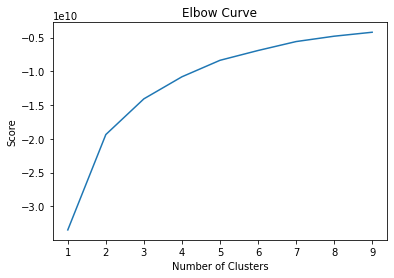

In [54]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [55]:
#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is three.

In [56]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [57]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\Mary\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [70]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\Mary\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-70-97c7b350e8f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [59]:
sub.head()

,review_score,distance,payment_value,n_of_days,clusters
0,5,2399.699757,18.30,3,0
1,4,2662.455144,289.45,6,1
2,5,2340.750167,57.75,2,0
3,5,2377.637320,57.75,2,0
4,3,2701.745065,286.45,8,1


In [60]:
sub['clusters'].value_counts()

0    66379
1    41205
2     5073
Name: clusters, dtype: int64

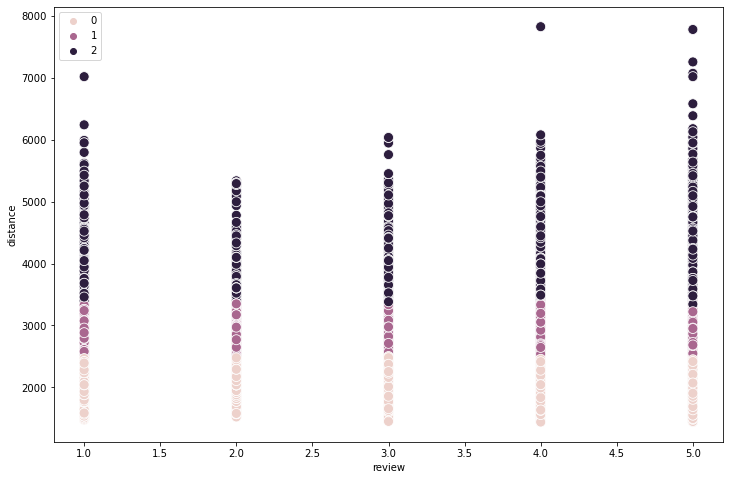

In [61]:
# Plot the clusters for the "Review" and "Distance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['review_score'], y=sub['distance'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('review') # Label x-axis.
plt.ylabel('distance') # Label y-axis.
plt.show()

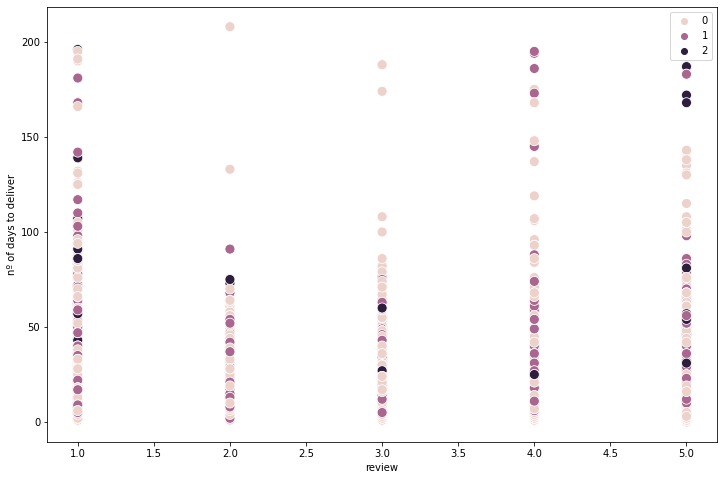

In [62]:
# Plot the clusters for the "review" and "n_of_days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['review_score'], y=sub['n_of_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('review') # Label x-axis.
plt.ylabel('nº of days to deliver') # Label y-axis.
plt.show()

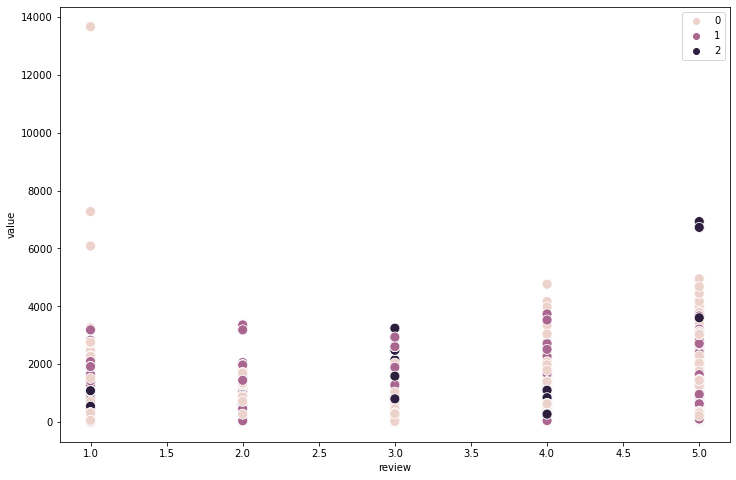

In [66]:
# Plot the clusters for the "review" and "value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['review_score'], y=sub['payment_value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('review') # Label x-axis.
plt.ylabel('value') # Label y-axis.
plt.show()

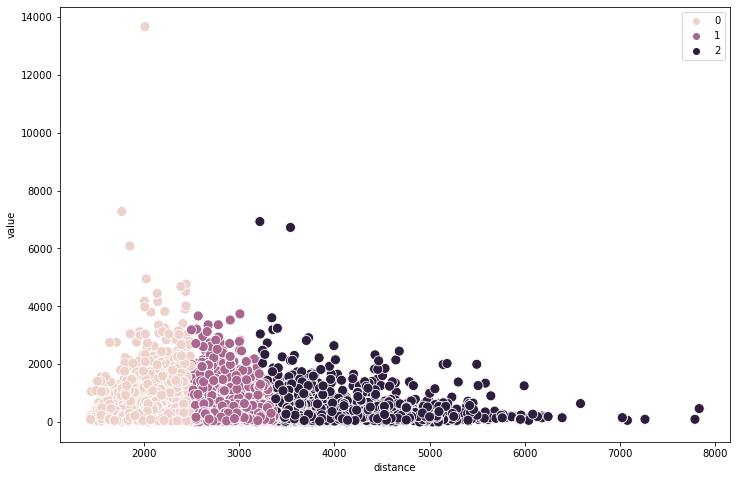

In [63]:
# Plot the clusters for the "distance" and "value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['distance'], y=sub['payment_value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('distance') # Label x-axis.
plt.ylabel('value') # Label y-axis.
plt.show()

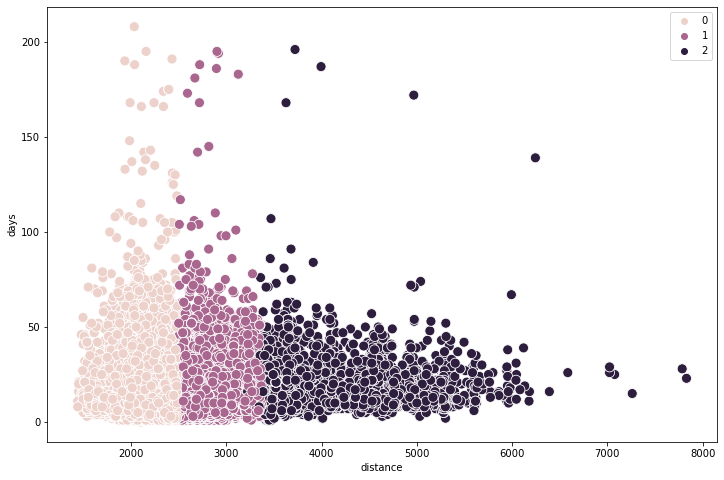

In [64]:
# Plot the clusters for the "distance" and "n_of_days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['distance'], y=sub['n_of_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('distance') # Label x-axis.
plt.ylabel('days') # Label y-axis.
plt.show()

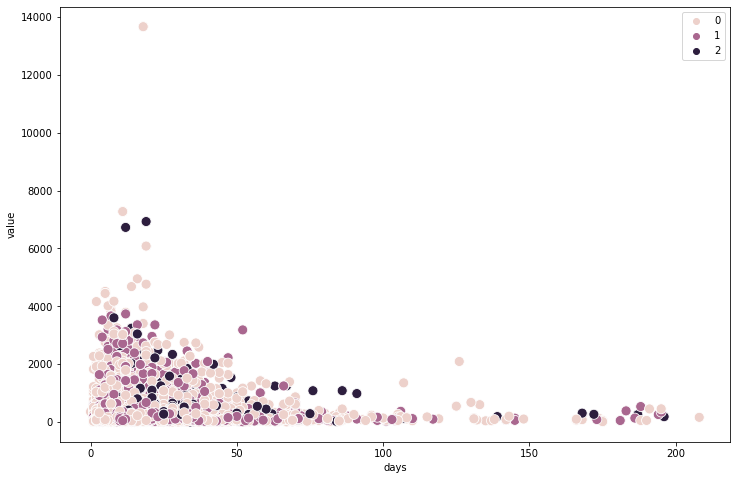

In [65]:
# Plot the clusters for the "n_of_days" and "value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['n_of_days'], y=sub['payment_value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('days') # Label x-axis.
plt.ylabel('value') # Label y-axis.
plt.show()

In [72]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [73]:
sub.groupby('cluster').agg({'review_score':['mean', 'median'], 
                         'n_of_days':['mean', 'median'], 
                         'distance':['mean', 'median'],
                          'payment_value':['mean', 'median']})

review_score         n_of_days            distance               \
                    mean median       mean median         mean       median   
cluster                                                                       
dark purple     4.041363      5  18.015166     16  3952.258010  3691.621050   
pink            4.088542      5  12.933102     11  2788.632448  2742.150459   
purple          4.081274      5  11.590028      9  2218.492529  2282.120294   

            payment_value           
                     mean   median  
cluster                             
dark purple    254.551735  152.610  
pink           170.197852  111.205  
purple         166.169048  103.855

In [75]:
# When the distance is used in the scatterplot, the visualization shows the clusters well delimited. I guess this was the main criteria to create the clusters. Meaning also that distance could be influence the other variables.